In [1]:
import json
import numpy as np
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib import rc
import random

### 파일 업로드

In [2]:
# matplotlib 한글 폰트 깨짐 문제 해결
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
fontprop = fm.FontProperties(fname=font_path)

In [3]:
# 경로 설정

data_path = '/workspace/Data_All/'

img_path = data_path + 'image/'                     # /workspace/Data_All/image/
json_path = data_path + 'label/'                    # /workspace/Data_All/label/
segment_path = data_path + 'segmentation/'          # /workspace/Data_All/segmentation/

anger_img_path = img_path + 'anger/'                 # /workspace/Data_ALL/image/anger/
happy_img_path = img_path + 'happy/'                 # /workspace/Data_ALL/image/happy/
panic_img_path = img_path + 'panic/'                 # /workspace/Data_ALL/image/panic/
sadness_img_path = img_path + 'sadness/'             # /workspace/Data_ALL/image/sadness/

In [4]:
# 라벨 정보 json 파일 (train, val, test 파일 통합)
# train_panic.json + val_panic.json + test_panic.json -> json_panic

# json 파일 각각 불러오기
with open (json_path + "train_panic.json", "r", encoding='euc-kr') as f:
    json_panic_train = json.load(f)
with open (json_path + "val_panic.json", "r", encoding='euc-kr') as f:
    json_panic_val = json.load(f)
with open (json_path + "test_panic.json", "r", encoding='euc-kr') as f:
    json_panic_test = json.load(f)

# 하나의 파일로 통합
json_panic = []
if isinstance(json_panic_train, list):
    json_panic.extend(json_panic_train)
if isinstance(json_panic_val, list):
    json_panic.extend(json_panic_val)
if isinstance(json_panic_test, list):
    json_panic.extend(json_panic_test)

In [6]:
# Segmentation 정보 npz 파일 (train, val, test 통합된 파일)
# npz_panic

npz_panic = np.load(segment_path + 'combined_panic.npz')

In [7]:
# json 파일 내 이미지 이름들과 npz 파일 내 이미지 이름들이 동일한지 확인

json_filenames = [item['filename'] for item in json_panic]
npz_filenames = list(npz_panic.keys())

# 동일 여부 확인
common_filenames = set(json_filenames) & set(npz_filenames)  # 교집합
only_in_json = set(json_filenames) - set(npz_filenames)      # JSON에만 있는 파일
only_in_npz = set(npz_filenames) - set(json_filenames)       # NPZ에만 있는 파일

# 결과 출력
print(f"공통 파일 개수: {len(common_filenames)}")
print(f"JSON에만 있는 파일 개수: {len(only_in_json)}")
print(f"NPZ에만 있는 파일 개수: {len(only_in_npz)}")

공통 파일 개수: 2100
JSON에만 있는 파일 개수: 0
NPZ에만 있는 파일 개수: 1


In [8]:
only_in_npz

{'64f21a1de3537ea5e57bfcf0195951512db6f5def5575b49eb7eea785bb25emqj(1).jpg'}

In [10]:
key_to_check_1 = '64f21a1de3537ea5e57bfcf0195951512db6f5def5575b49eb7eea785bb25emqj(1).jpg'
key_to_check_2 = '64f21a1de3537ea5e57bfcf0195951512db6f5def5575b49eb7eea785bb25emqj.jpg'

# if key_to_check_1 in npz_happy:
#     print(f"Data for key '{key_to_check_1}':")
#     print(npz_happy[key_to_check_1].shape)
#     print(npz_happy[key_to_check_1])
# else:
#     print(f"Key '{key_to_check_1}' not found in the npz file.")

# if key_to_check_2 in npz_happy:
#     print(f"Data for key '{key_to_check_2}':")
#     print(npz_happy[key_to_check_2].shape)
#     print(npz_happy[key_to_check_2])
# else:
#     print(f"Key '{key_to_check_2}' not found in the npz file.")

data1 = npz_panic[key_to_check_1]
data2 = npz_panic[key_to_check_2]

# 데이터 비교
if np.array_equal(data1, data2):
    print(f"The data for '{key_to_check_1}' and '{key_to_check_2}' are identical.")
else:
    print(f"The data for '{key_to_check_1}' and '{key_to_check_2}' are different.")

The data for '64f21a1de3537ea5e57bfcf0195951512db6f5def5575b49eb7eea785bb25emqj(1).jpg' and '64f21a1de3537ea5e57bfcf0195951512db6f5def5575b49eb7eea785bb25emqj.jpg' are identical.


In [11]:
# 겹치는 데이터 삭제

key_to_delete = key_to_check_1

updated_data = {key: npz_panic[key] for key in npz_panic.keys() if key != key_to_delete}

combined_npz_path = segment_path + 'combined_panic_updated.npz'
np.savez_compressed(combined_npz_path, **updated_data)


In [13]:
# json 파일 내 이미지 이름들과 npz 파일 내 이미지 이름들이 동일한지 확인 (npz 데이터 수정 후)

npz_panic = np.load(segment_path + 'combined_panic_updated.npz')

json_filenames = [item['filename'] for item in json_panic]
npz_filenames = list(npz_panic.keys())

# 동일 여부 확인
common_filenames = set(json_filenames) & set(npz_filenames)  # 교집합
only_in_json = set(json_filenames) - set(npz_filenames)      # JSON에만 있는 파일
only_in_npz = set(npz_filenames) - set(json_filenames)       # NPZ에만 있는 파일

# 결과 출력
print(f"공통 파일 개수: {len(common_filenames)}")
print(f"JSON에만 있는 파일 개수: {len(only_in_json)}")
print(f"NPZ에만 있는 파일 개수: {len(only_in_npz)}")

공통 파일 개수: 2100
JSON에만 있는 파일 개수: 0
NPZ에만 있는 파일 개수: 0


In [14]:
# npz 파일 확인

# 파일에 저장된 데이터 키 확인
keys = list(npz_panic.keys())[:10]  # 처음 10개의 키만 가져옴
print("npz 파일 길이 : ", len(npz_panic))
print("Keys in .npz file:", npz_panic.keys())

# 각 키에 대한 배열 정보 출력
for key in keys:
    array = npz_panic[key]
    print(f"\nKey: {key}")
    print(f"Shape: {array.shape}")
    print(f"Data type: {array.dtype}")
    print(f"Array contents:\n{array}")

npz 파일 길이 :  2100
Keys in .npz file: KeysView(NpzFile '/workspace/Data_All/segmentation/combined_panic_updated.npz' with keys: 007b10b45d424e7876e73b6b66d62d603c6ef2ee886761e570b2110e47608iwlr.jpg, 01hq73db2125c694f5f555f744b2020c112251215b9574bb0101ff04ae007ut37.jpg, 059hc8436a3e46efdc3c20e94dca8704846b408dfcfc39c2ec4a8be2ad1dazqrw.jpg, 07rq89a5d735a958d1783db31a7cd098f60969900662e10035762826bd005hlhp.jpg, 07tff4b4c1effe4a4c40c60a73eeaf1ff004ca1b48b77632cbabc5a5ce04cu8vr.jpg...)

Key: 007b10b45d424e7876e73b6b66d62d603c6ef2ee886761e570b2110e47608iwlr.jpg
Shape: (1737, 3088)
Data type: uint8
Array contents:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]]

Key: 01hq73db2125c694f5f555f744b2020c112251215b9574bb0101ff04ae007ut37.jpg
Shape: (2208, 2944)
Data type: uint8
Array contents:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]]

Key: 059hc8436a3

### Segmentation

In [15]:
# Segmentation 색상 설정 
# 0 : 보라색, 1 : 노란색, 2 : 빨간색, 3 : 초록색, 4 : 파란색, 5 : 주황색

colors = ['purple', 'yellow', 'red', 'green', 'blue', 'orange']
cmap = ListedColormap(colors)

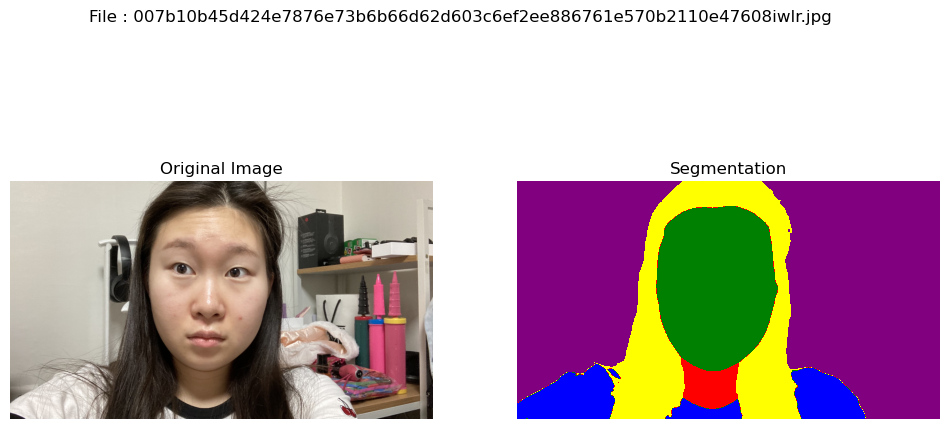

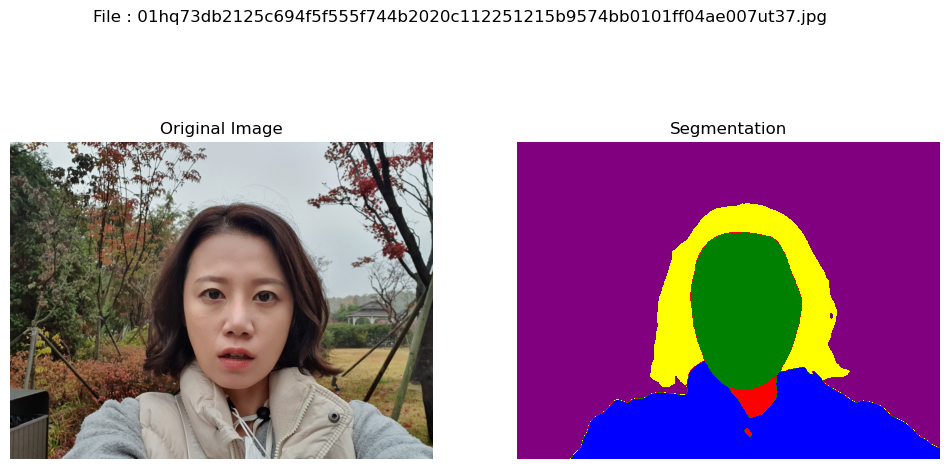

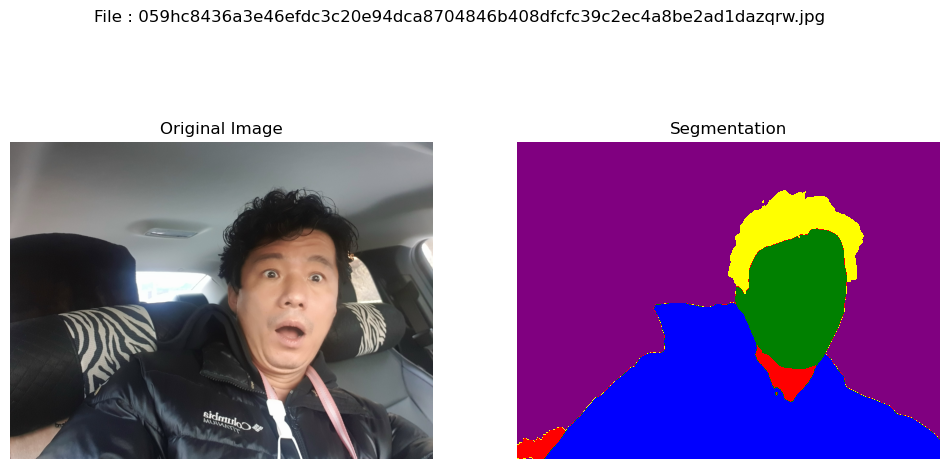

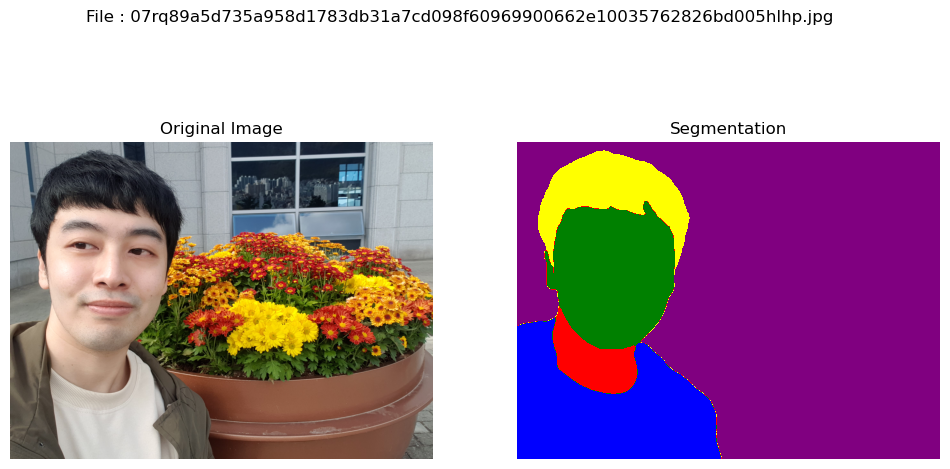

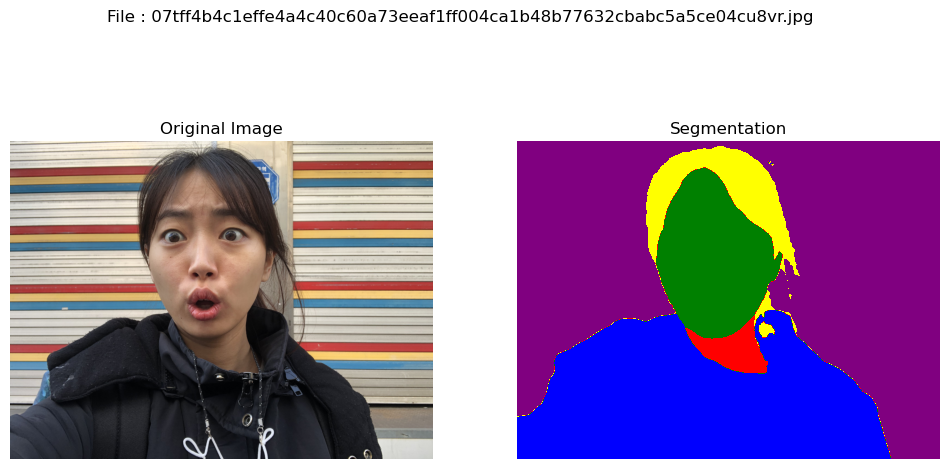

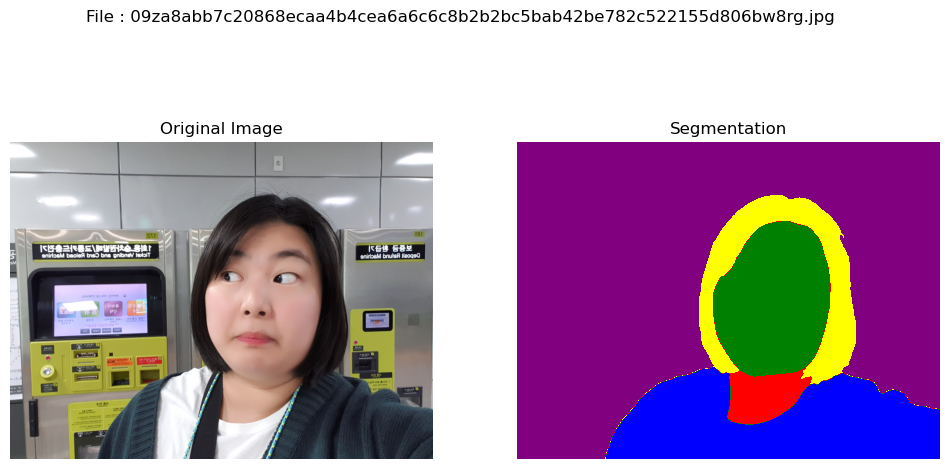

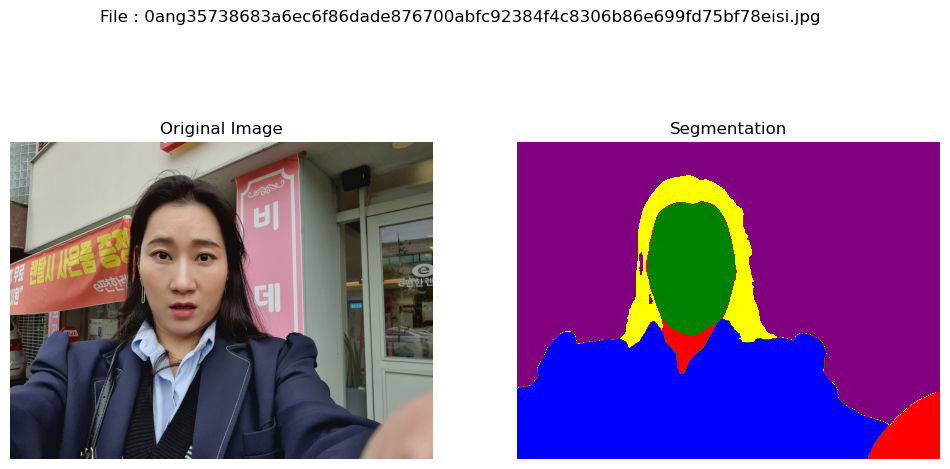

Invalid SOS parameters for sequential JPEG


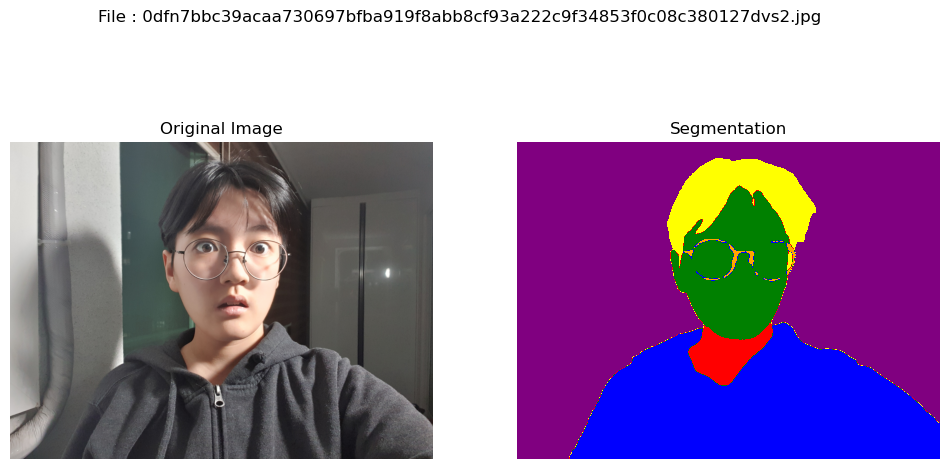

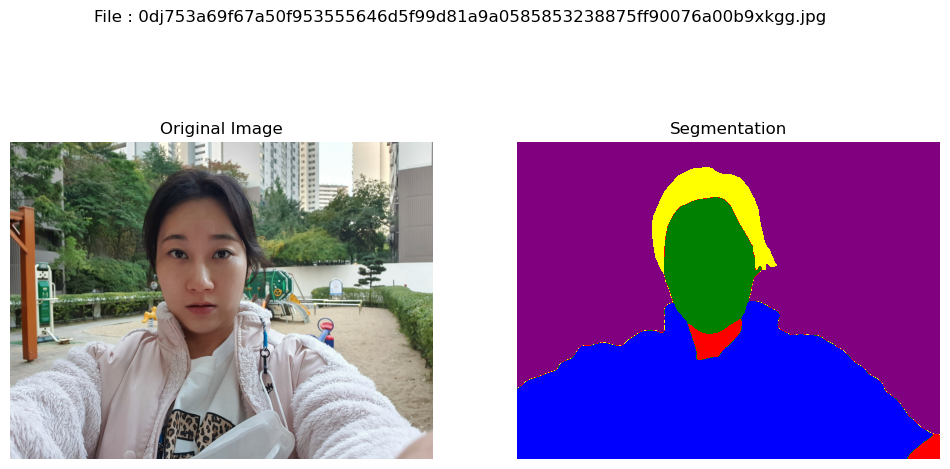

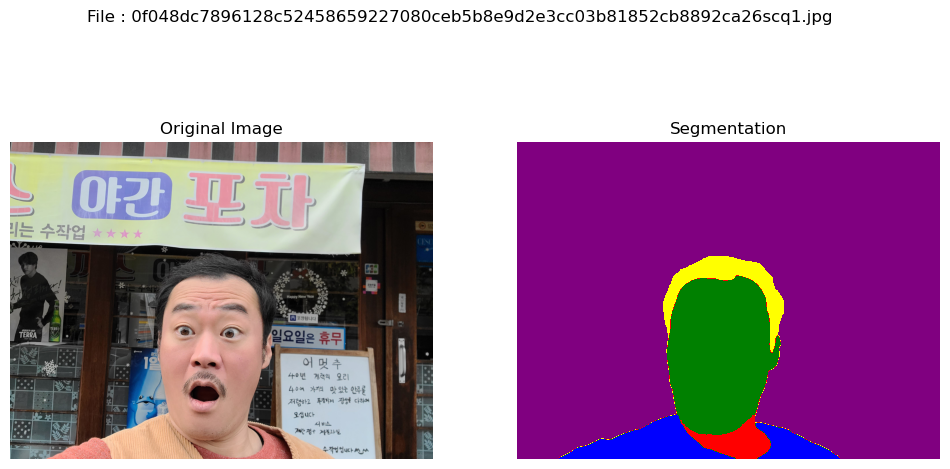

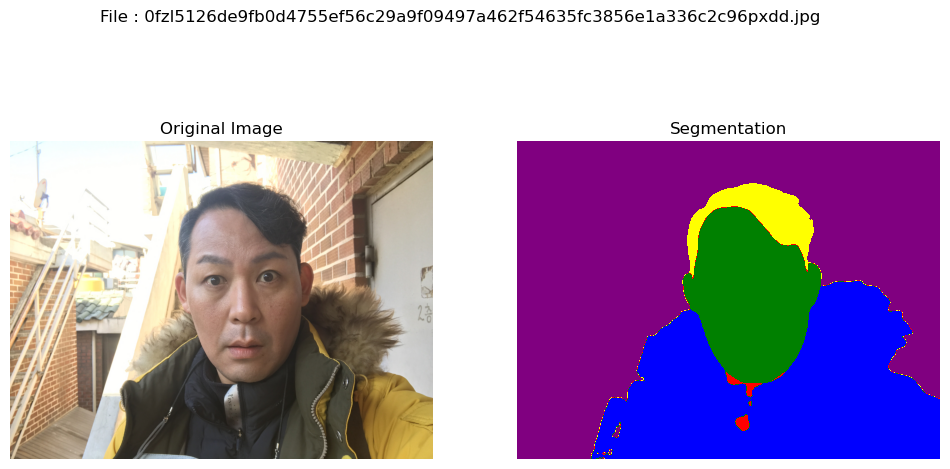

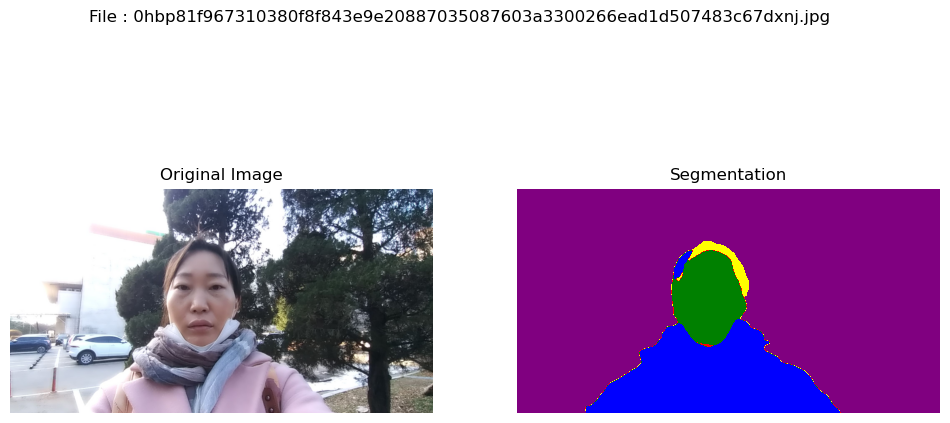

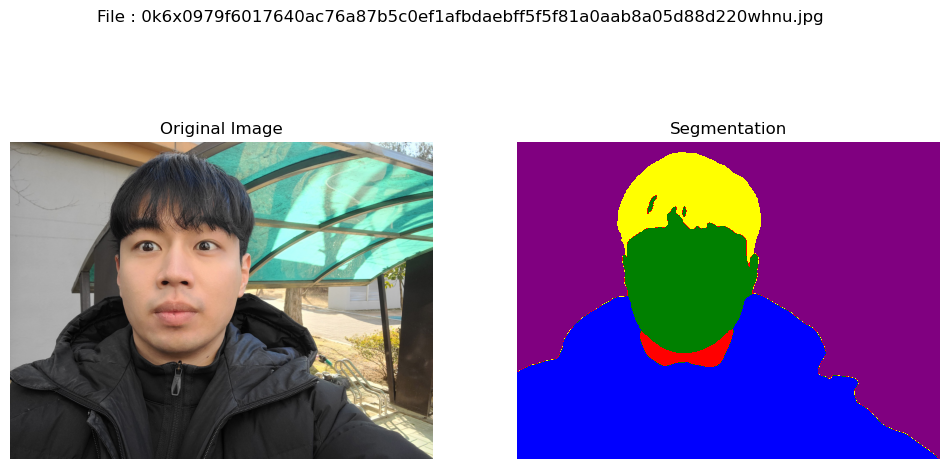

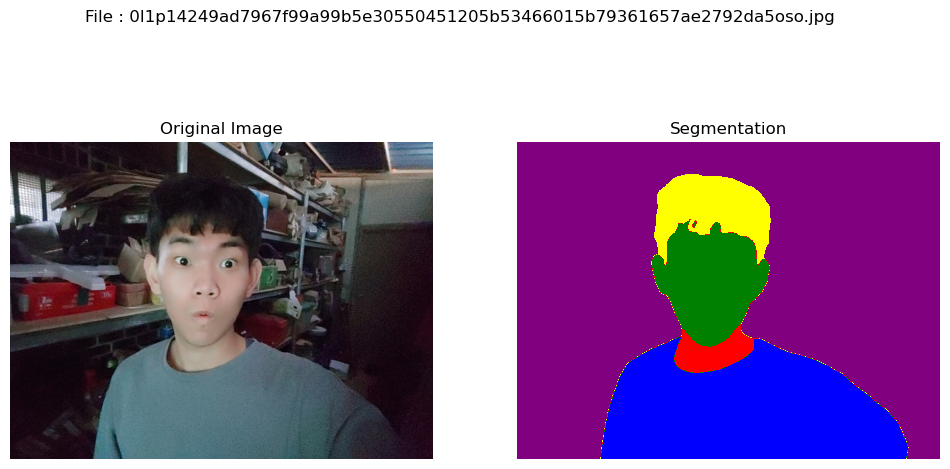

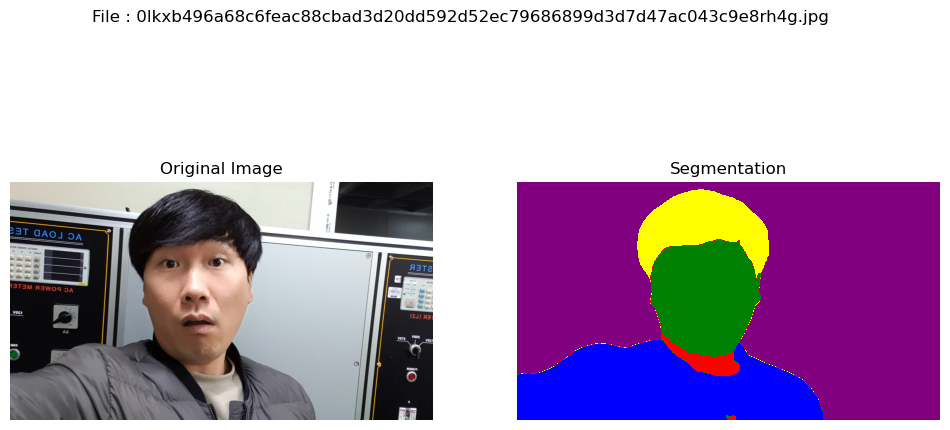

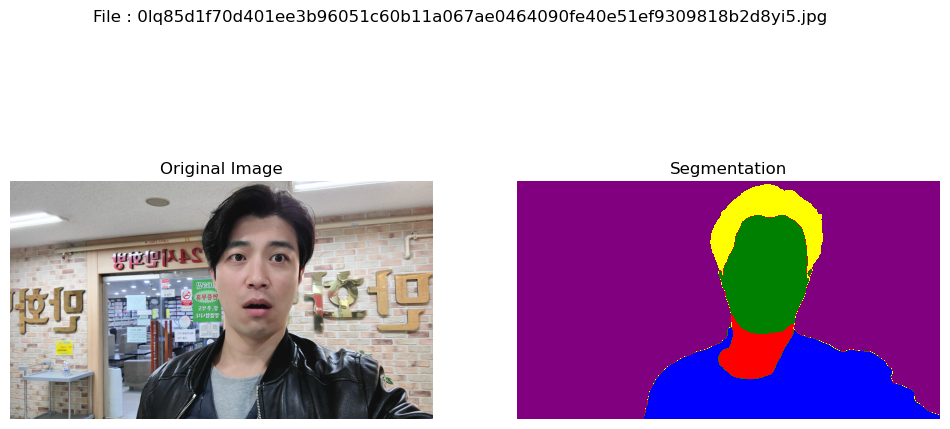

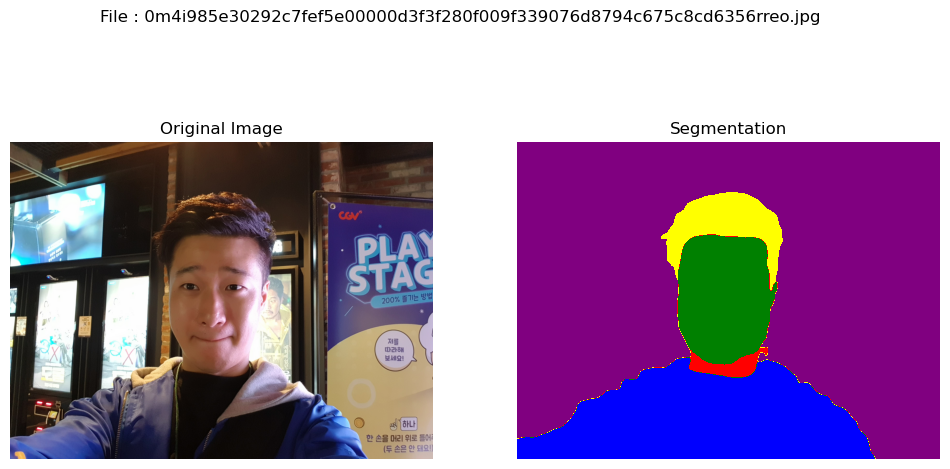

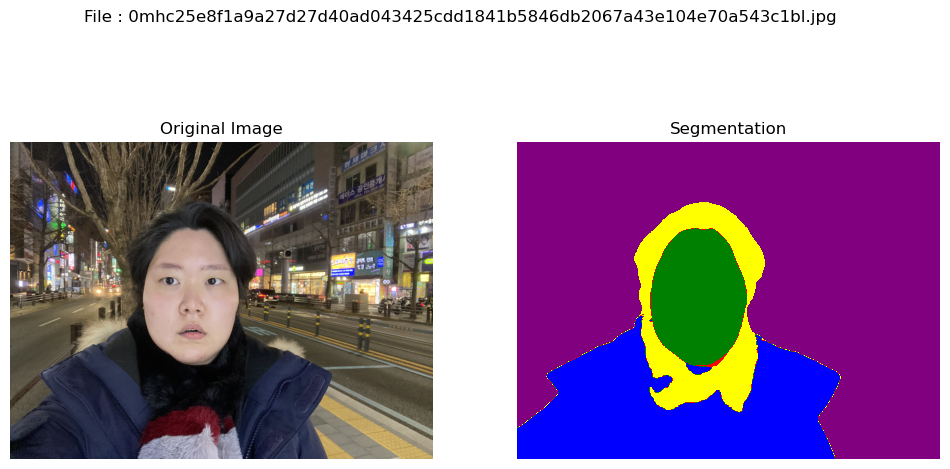

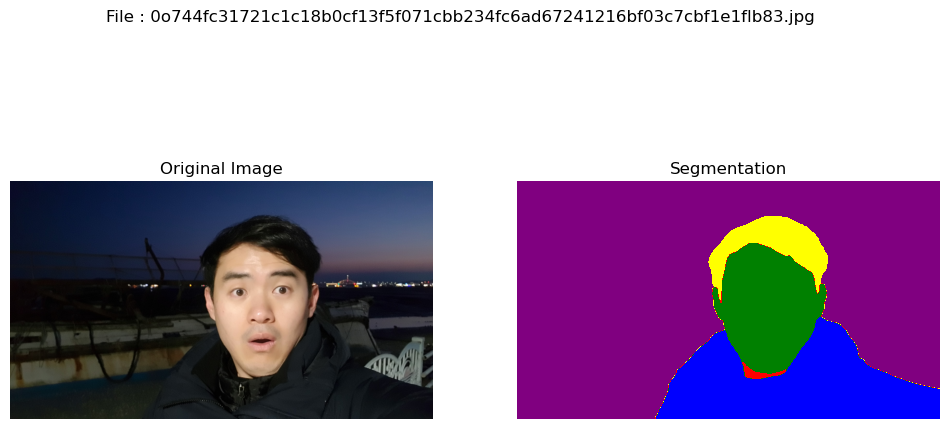

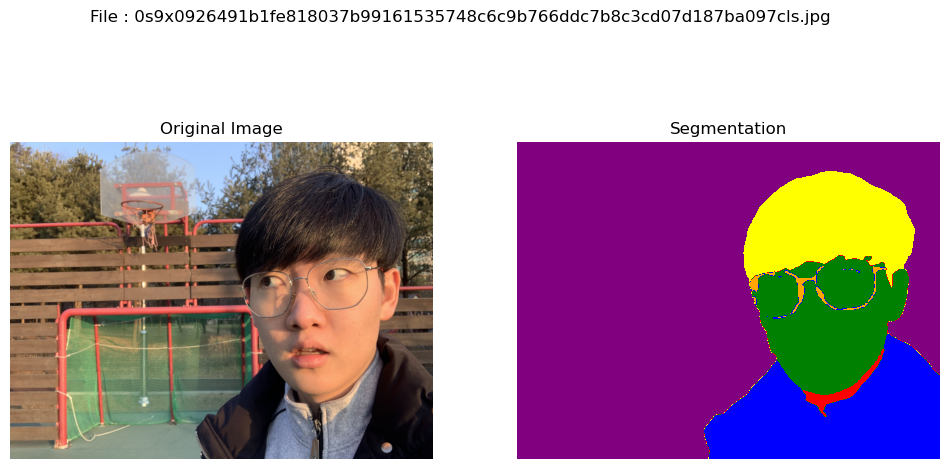

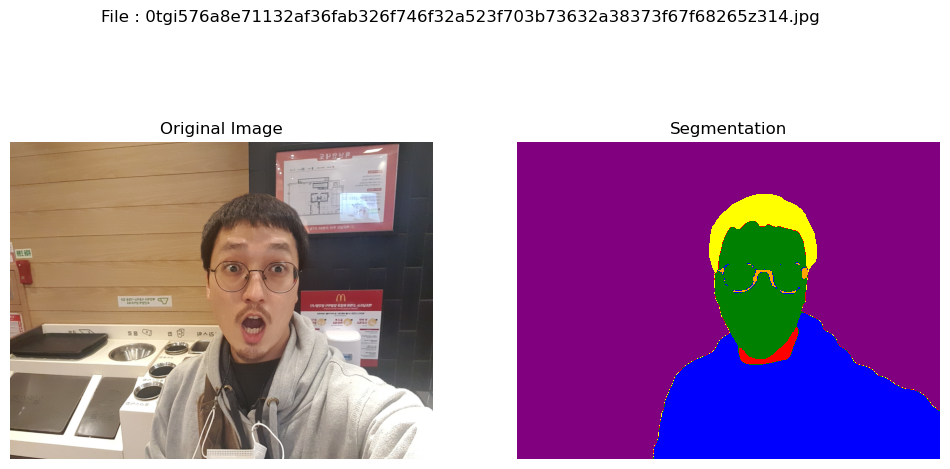

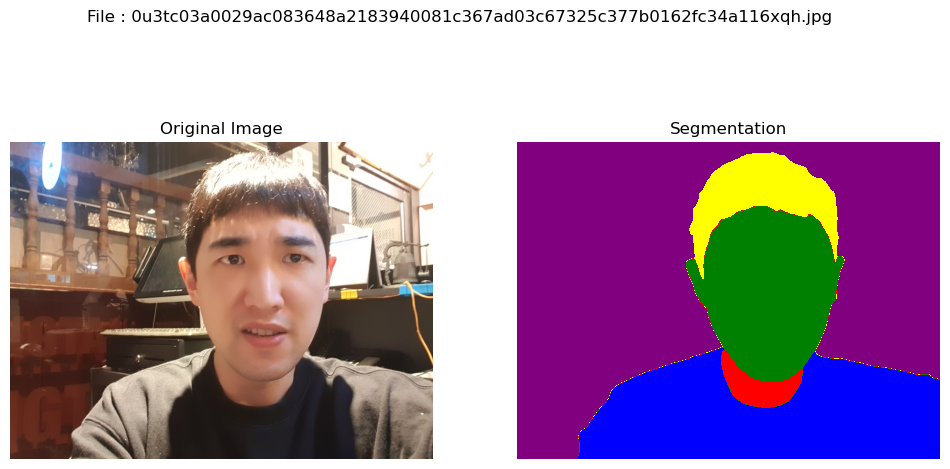

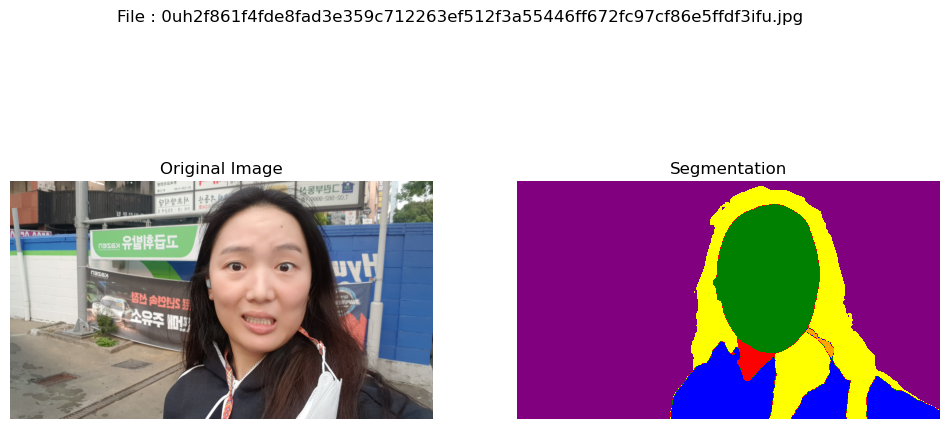

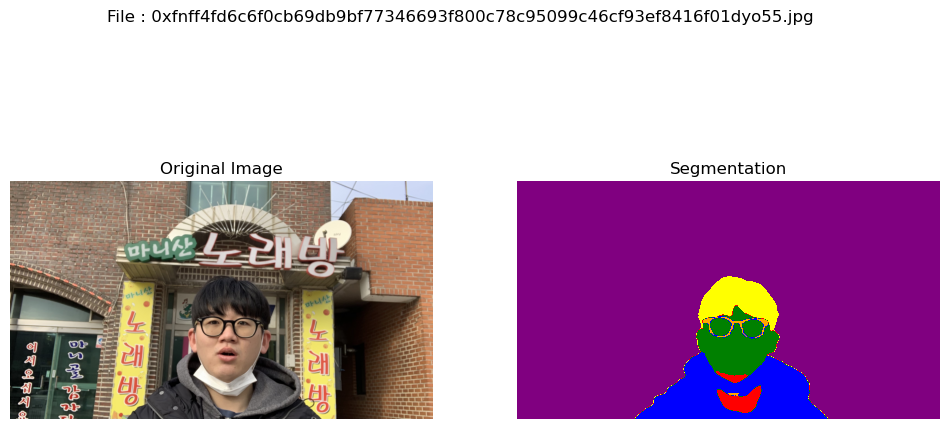

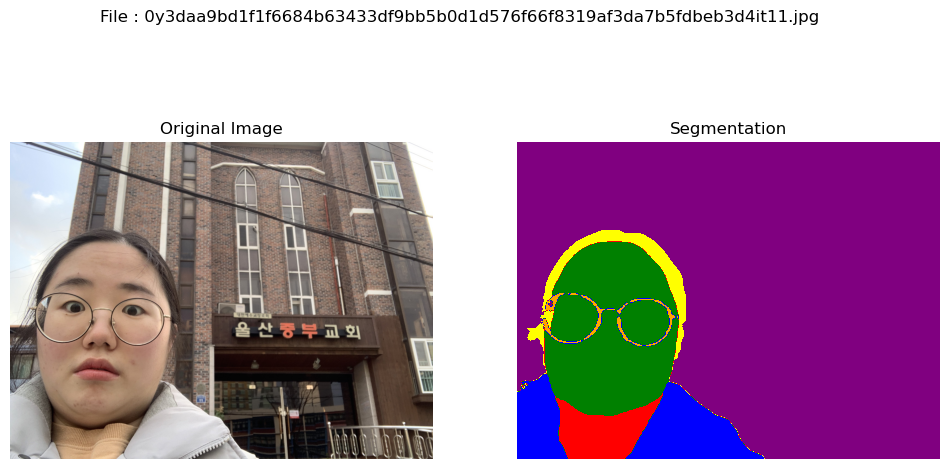

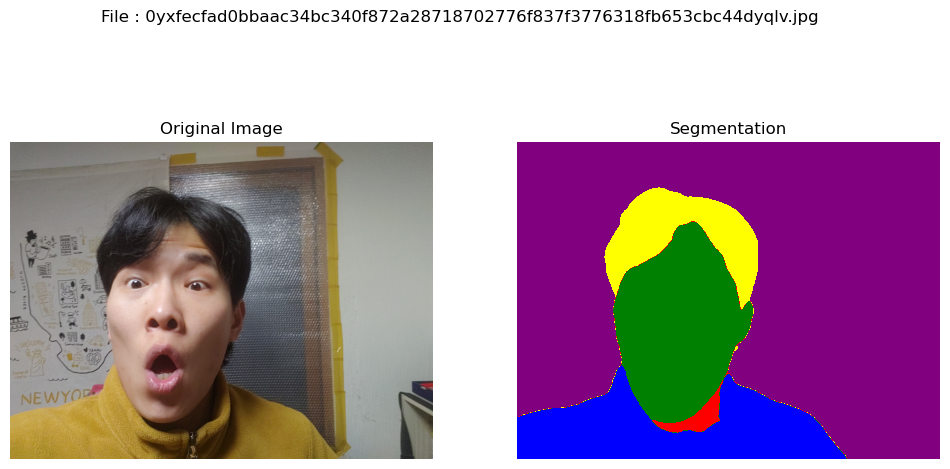

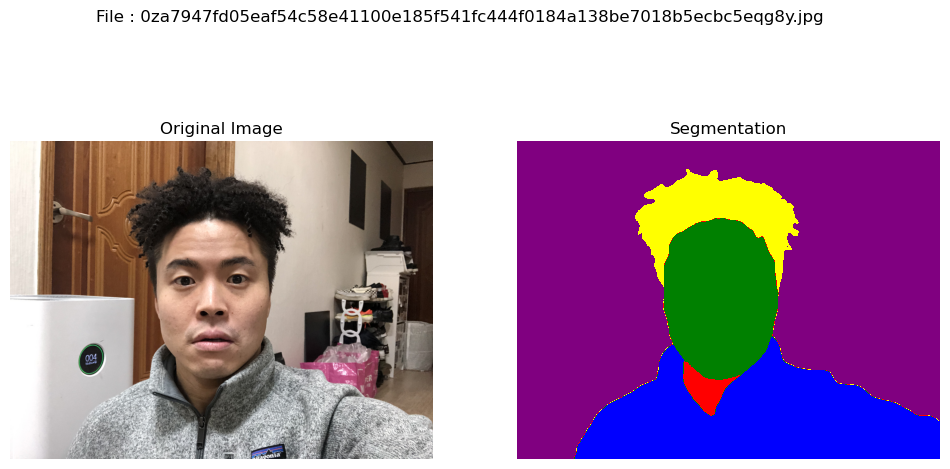

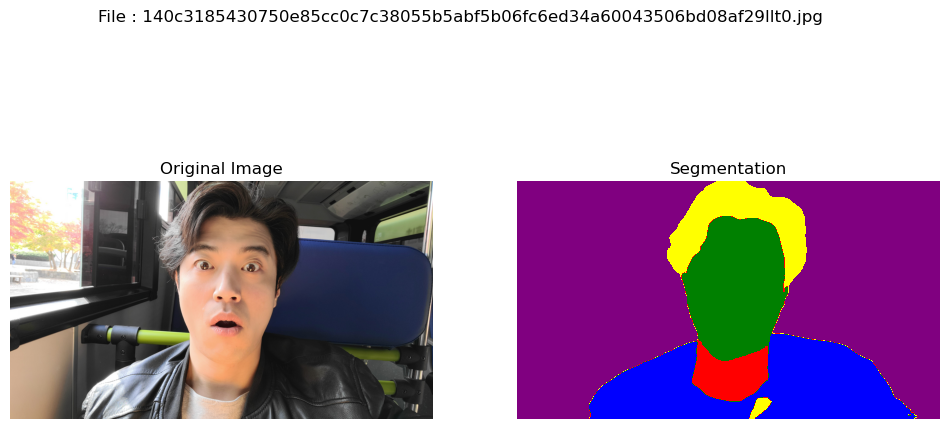

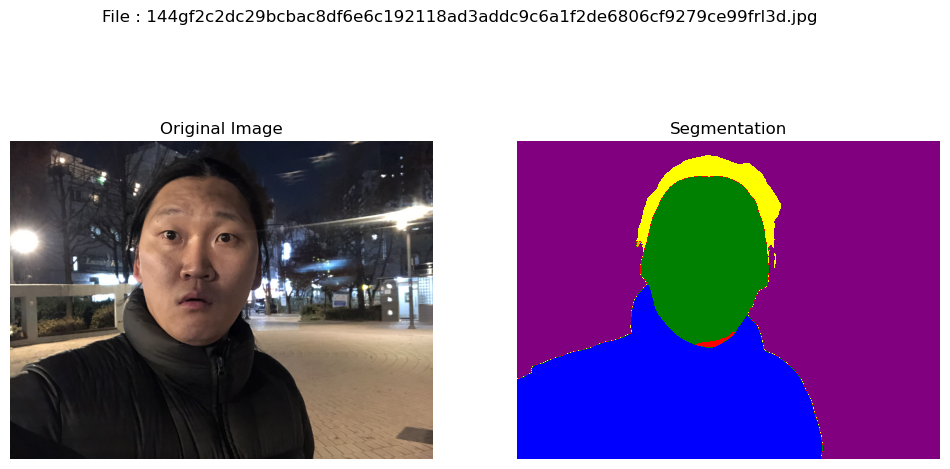

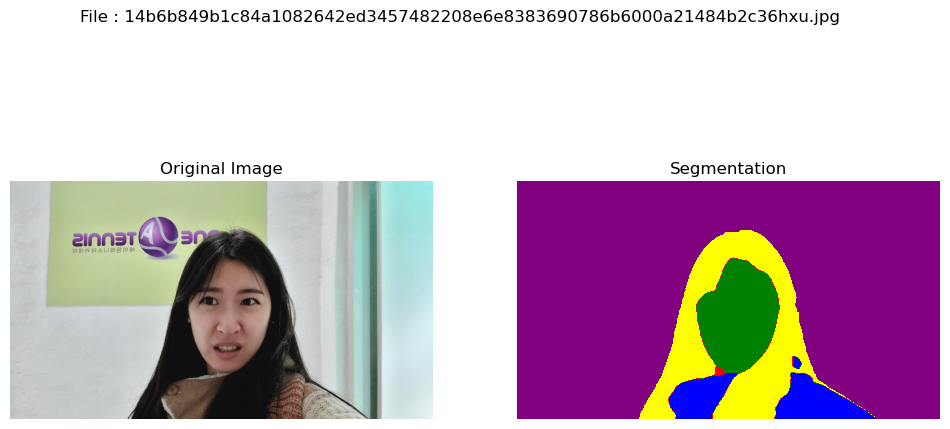

In [16]:
filenames = npz_filenames   # npz_filenames = list(npz_panic.keys())

for filename in filenames[:30]:
    data = npz_panic[filename]  

    # 원본 이미지 로드
    image_path = os.path.join(panic_img_path, filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 시각화
    plt.figure(figsize=(12,6))

    # 원본 이미지
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    # Segmentation 시각화
    plt.subplot(1,2,2)
    plt.imshow(data, cmap=cmap, vmin=0, vmax=5)
    plt.title("Segmentation")
    plt.axis("off")

    plt.suptitle(f"File : {filename}")
    plt.show()

    